In [1]:
import shutil
from pathlib import Path
import os
import pandas as pd

C:\Users\sshri\AppData\Local\Temp\ipykernel_3492\197364822.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
!Nvidia-SMI

Thu Feb  1 13:10:14 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 551.23                 Driver Version: 551.23         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   47C    P3             10W /   30W |       0MiB /   6144MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
data = pd.read_csv('../Test_Data/summan.smr')

In [4]:
data.head()

,img_name,lat,lon,heading,pitch,timestamp,status,Tree,Pole w/ wire,Intersection
0,_panoid_-1tN4lEA-abrRGZw66d34Q_heading_294_pit...,-23.549251,-46.541349,294,-1,2019-03,free,1,1,0
1,_panoid_-2bCdOFUdXRl3YZkXZ2KVw_heading_224_pit...,-23.524786,-46.695520,224,4,2019-04,free,1,1,1
2,_panoid_-2bCdOFUdXRl3YZkXZ2KVw_heading_334_pit...,-23.524786,-46.695520,334,4,2019-04,free,1,1,1
3,_panoid_-2yEbA_Nn547hSIMJqXFmg_heading_133_pit...,-23.564307,-46.755973,133,6,2019-05,free,1,0,0
4,_panoid_-2yEbA_Nn547hSIMJqXFmg_heading_248_pit...,-23.564307,-46.755973,248,6,2019-05,free,1,0,0


In [5]:
data = data.drop('lat',axis=1)
data = data.drop('lon',axis=1)
data = data.drop('timestamp',axis=1)
data = data.drop('status',axis=1)
data.head()

,img_name,heading,pitch,Tree,Pole w/ wire,Intersection
0,_panoid_-1tN4lEA-abrRGZw66d34Q_heading_294_pit...,294,-1,1,1,0
1,_panoid_-2bCdOFUdXRl3YZkXZ2KVw_heading_224_pit...,224,4,1,1,1
2,_panoid_-2bCdOFUdXRl3YZkXZ2KVw_heading_334_pit...,334,4,1,1,1
3,_panoid_-2yEbA_Nn547hSIMJqXFmg_heading_133_pit...,133,6,1,0,0
4,_panoid_-2yEbA_Nn547hSIMJqXFmg_heading_248_pit...,248,6,1,0,0


In [6]:
from PIL import Image
import os

In [7]:
dataset_path = '../Test_Data/'

# Create a list to store file paths and corresponding labels
file_paths = []
labels = []

In [8]:
data['img_name'] = dataset_path + data['img_name']
data.head()

,img_name,heading,pitch,Tree,Pole w/ wire,Intersection
0,../Test_Data/_panoid_-1tN4lEA-abrRGZw66d34Q_he...,294,-1,1,1,0
1,../Test_Data/_panoid_-2bCdOFUdXRl3YZkXZ2KVw_he...,224,4,1,1,1
2,../Test_Data/_panoid_-2bCdOFUdXRl3YZkXZ2KVw_he...,334,4,1,1,1
3,../Test_Data/_panoid_-2yEbA_Nn547hSIMJqXFmg_he...,133,6,1,0,0
4,../Test_Data/_panoid_-2yEbA_Nn547hSIMJqXFmg_he...,248,6,1,0,0


In [9]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(data, test_size=0.2, random_state=42)

In [10]:
train_df.head()

,img_name,heading,pitch,Tree,Pole w/ wire,Intersection
535,../Test_Data/_panoid_-qW3U3yMEE8vz47tLnu1eg_he...,74,0,1,1,1
696,../Test_Data/_panoid_2HlR4Kl9I4I7ZiwABtpsLg_he...,20,0,1,1,0
557,../Test_Data/_panoid_00Y2OYhvDszADp7kTpQPSw_he...,62,-1,1,1,0
643,../Test_Data/_panoid_1oqQcQwNkHIpC62HBv2B3A_he...,200,0,1,1,1
597,../Test_Data/_panoid_0Ral0UQRhTFsLf2RDhJ1RQ_he...,180,-1,1,1,0


In [11]:
test_df.head()

,img_name,heading,pitch,Tree,Pole w/ wire,Intersection
521,../Test_Data/_panoid_-iajR7i019p5y3804BFsHQ_he...,16,0,1,1,1
941,../Test_Data/_panoid_663_1Lm2ffFgQ8Mc-LkkYQ_he...,276,3,1,1,1
741,../Test_Data/_panoid_35pYIATDnbbUSXxv3S5cqg_he...,220,-2,1,1,1
980,../Test_Data/_panoid_6mzXYi24lkzV8qCqUrjNeQ_he...,286,0,1,1,0
411,../Test_Data/_panoid_1eMMB01aA_uyCOWecNMRiw_he...,338,-1,1,1,1


In [12]:
train_df.shape,test_df.shape

In [13]:
import tensorflow as tf

In [14]:
train_dataset = tf.data.Dataset.from_tensor_slices(
    (train_df['img_name'].values, train_df['Intersection'].values)
)
print(train_dataset)

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


In [15]:
test_dataset = tf.data.Dataset.from_tensor_slices(
    (test_df['img_name'].values, test_df['Intersection'].values)
)
print(test_dataset)

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


In [16]:
x = 0
for img_name, intersection in train_dataset: 
    x += 1
    print("Image Name:", img_name.numpy())
    print("Intersection Value:", intersection)
    print("---")
x

Image Name: b'../Test_Data/_panoid_-qW3U3yMEE8vz47tLnu1eg_heading_74_pitch_0.png'
Intersection Value: tf.Tensor(1, shape=(), dtype=int64)
---
Image Name: b'../Test_Data/_panoid_2HlR4Kl9I4I7ZiwABtpsLg_heading_20_pitch_0.png'
Intersection Value: tf.Tensor(0, shape=(), dtype=int64)
---
Image Name: b'../Test_Data/_panoid_00Y2OYhvDszADp7kTpQPSw_heading_62_pitch_-1.png'
Intersection Value: tf.Tensor(0, shape=(), dtype=int64)
---
Image Name: b'../Test_Data/_panoid_1oqQcQwNkHIpC62HBv2B3A_heading_200_pitch_0.png'
Intersection Value: tf.Tensor(1, shape=(), dtype=int64)
---
Image Name: b'../Test_Data/_panoid_0Ral0UQRhTFsLf2RDhJ1RQ_heading_180_pitch_-1.png'
Intersection Value: tf.Tensor(0, shape=(), dtype=int64)
---
Image Name: b'../Test_Data/_panoid_-wsxQ006BBJ05m5fAW4LBA_heading_89_pitch_0.png'
Intersection Value: tf.Tensor(1, shape=(), dtype=int64)
---
Image Name: b'../Test_Data/_panoid_5odBlti1I0KY6RZfBNgAMw_heading_229_pitch_8.png'
Intersection Value: tf.Tensor(0, shape=(), dtype=int64)
---
I

800

In [17]:
def load_and_preprocess_image(file_path, label):
    image = tf.io.read_file(file_path)
    image = tf.image.decode_image(image, channels=3)  # Adjust channels based on your images

    # Explicitly set the shape of the image tensor
    image.set_shape([640, 640, 3])  # Assuming 3 channels for RGB images

    # Resize the image
    image = tf.image.resize(image, (640, 640))  # Adjust size as needed

    image = image / 255.0  # Normalize pixel values to the range [0, 1]
    return image, label

In [18]:
train_dataset = train_dataset.map(load_and_preprocess_image)

In [19]:
test_dataset = test_dataset.map(load_and_preprocess_image)

In [20]:
!Nvidia-SMI

Thu Feb  1 13:10:34 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 551.23                 Driver Version: 551.23         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   50C    P3             11W /   41W |    3698MiB /   6144MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [21]:
train_dataset = train_dataset.shuffle(buffer_size=len(train_df))
train_dataset = train_dataset.batch(32)

In [22]:
test_dataset = test_dataset.shuffle(buffer_size=len(train_df))
test_dataset = test_dataset.batch(32)

In [23]:
x = 0
y = None
for img, intersection in train_dataset:  # Adjust the number as needed
    print("Image Name:", img_name.numpy())
    print('image is ',img.numpy())
    print("Intersection Value:", intersection.numpy())
    print("---")
    y = img

Image Name: b'../Test_Data/_panoid_-ofjwRvu_CtaQiBRxLgxDQ_heading_211_pitch_-3.png'
image is  [[[[0.07450981 0.10196079 0.07058824]
   [0.07450981 0.10196079 0.07058824]
   [0.07450981 0.10196079 0.07058824]
   ...
   [0.49411765 0.5411765  0.34509805]
   [0.5764706  0.62352943 0.43529412]
   [0.8039216  0.8509804  0.67058825]]

  [[0.07843138 0.10588235 0.07450981]
   [0.08235294 0.10980392 0.07843138]
   [0.08235294 0.10980392 0.07843138]
   ...
   [0.57254905 0.62352943 0.40392157]
   [0.5921569  0.6431373  0.43137255]
   [0.6117647  0.6627451  0.45490196]]

  [[0.07058824 0.09803922 0.06666667]
   [0.07450981 0.10196079 0.07058824]
   [0.07843138 0.10588235 0.07450981]
   ...
   [0.5372549  0.6039216  0.32941177]
   [0.5254902  0.5921569  0.3254902 ]
   [0.52156866 0.5882353  0.32156864]]

  ...

  [[0.6745098  0.69803923 0.65882355]
   [0.69803923 0.72156864 0.68235296]
   [0.6784314  0.7019608  0.6627451 ]
   ...
   [0.10980392 0.13333334 0.13333334]
   [0.06666667 0.09019608 0.0

In [24]:
y.shape

TensorShape([32, 640, 640, 3])

In [25]:
base_model = tf.keras.applications.NASNetMobile(input_shape=(640,640,3),
                                                           include_top=False,
                                                           weights='imagenet')
base_model.trainable = False

In [26]:
from tensorflow.keras import layers, models

# Define your base model
# Build the modified model with an additional convolutional layer
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1000, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(500, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 NASNet (Functional)         (None, 20, 20, 1056)      4269716   
                                                                 
 global_average_pooling2d (G  (None, 1056)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1000)              1057000   
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                        

In [44]:
model.compile(optimizer='adam',
                      loss='binary_crossentropy',  # Adjust the loss function based on your task
                      metrics=['accuracy'])

In [27]:
epochs = 40  # Adjust the number of epochs as needed
base_model.trainable = False
history = model.fit(
    train_dataset,
    epochs=epochs,   
)
history

Epoch 1/40
25/25 [==============================] - 36s 924ms/step - loss: 0.7825 - accuracy: 0.5475
Epoch 2/40
25/25 [==============================] - 24s 919ms/step - loss: 0.6936 - accuracy: 0.5838
Epoch 3/40
25/25 [==============================] - 25s 972ms/step - loss: 0.6521 - accuracy: 0.6263
Epoch 4/40
25/25 [==============================] - 26s 959ms/step - loss: 0.6592 - accuracy: 0.6112
Epoch 5/40
25/25 [==============================] - 26s 963ms/step - loss: 0.6375 - accuracy: 0.6338
Epoch 6/40
25/25 [==============================] - 26s 1s/step - loss: 0.6240 - accuracy: 0.6550
Epoch 7/40
25/25 [==============================] - 26s 1s/step - loss: 0.6046 - accuracy: 0.6637
Epoch 8/40
25/25 [==============================] - 25s 976ms/step - loss: 0.5795 - accuracy: 0.6900
Epoch 9/40
25/25 [==============================] - 26s 989ms/step - loss: 0.6006 - accuracy: 0.6875
Epoch 10/40
25/25 [==============================] - 26s 1s/step - loss: 0.5770 - accuracy: 0.686

In [35]:
epochs = 5  # Adjust the number of epochs as needed
base_model.trainable = False
history = model.fit(
    train_dataset,
    epochs=epochs,   
)

print(model.evaluate(test_dataset))
print(model.evaluate(train_dataset))

Epoch 1/5
25/25 [==============================] - 50s 2s/step - loss: 0.5352 - accuracy: 0.6687
Epoch 2/5
25/25 [==============================] - 52s 2s/step - loss: 0.4935 - accuracy: 0.7175
Epoch 3/5
25/25 [==============================] - 57s 2s/step - loss: 0.4329 - accuracy: 0.7613
Epoch 4/5
25/25 [==============================] - 58s 2s/step - loss: 0.4128 - accuracy: 0.7850
Epoch 5/5
6/6 [==============================] - 21s 4s/step - loss: 0.5773 - accuracy: 0.6667
[0.5773248672485352, 0.6666666865348816]
10/25 [===========>..................] - ETA: 1:05 - loss: 0.3142 - accuracy: 0.9000

In [29]:
epochs = 20  # Adjust the number of epochs as needed
base_model.trainable = False
history = model.fit(
    train_dataset,
    epochs=epochs,   
)
history

Epoch 1/20
25/25 [==============================] - 32s 1s/step - loss: 0.5302 - accuracy: 0.7375
Epoch 2/20
25/25 [==============================] - 32s 1s/step - loss: 0.4839 - accuracy: 0.7625
Epoch 3/20
25/25 [==============================] - 33s 1s/step - loss: 0.4453 - accuracy: 0.7962
Epoch 4/20
25/25 [==============================] - 35s 1s/step - loss: 0.4119 - accuracy: 0.8188
Epoch 5/20
25/25 [==============================] - 38s 1s/step - loss: 0.3926 - accuracy: 0.8087
Epoch 6/20
25/25 [==============================] - 35s 1s/step - loss: 0.3969 - accuracy: 0.8163
Epoch 7/20
25/25 [==============================] - 35s 1s/step - loss: 0.4040 - accuracy: 0.8125
Epoch 8/20
25/25 [==============================] - 34s 1s/step - loss: 0.3871 - accuracy: 0.8250
Epoch 9/20
25/25 [==============================] - 37s 1s/step - loss: 0.4155 - accuracy: 0.8075
Epoch 10/20
25/25 [==============================] - 36s 1s/step - loss: 0.3994 - accuracy: 0.8025
Epoch 11/20
25/25 [

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 NASNet (Functional)         (None, 20, 20, 1056)      4269716   
                                                                 
 global_average_pooling2d (G  (None, 1056)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1000)              1057000   
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                        

In [ ]:
model.save('NASNET640_640_640_60NofineTuning')
print(model.evaluate(train_dataset))
model.evaluate(test_dataset)

INFO:tensorflow:Assets written to: NASNET640_640_640_60NofineTuning\assets


INFO:tensorflow:Assets written to: NASNET640_640_640_60NofineTuning\assets


25/25 [==============================] - 48s 2s/step - loss: 0.2533 - accuracy: 0.9325
[0.2533204257488251, 0.9325000047683716]
6/6 [==============================] - 9s 1s/step - loss: 0.6199 - accuracy: 0.6608


[0.6199379563331604, 0.6608186960220337]

In [31]:
epochs = 15  # Adjust the number of epochs as needed
history = model.fit(
    test_dataset,
    epochs=epochs
)
history

Epoch 1/15


ResourceExhaustedError: Graph execution error:

Detected at node 'sequential/vgg16/block1_conv1/Relu' defined at (most recent call last):
    File "c:\Users\sshri\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\sshri\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\sshri\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\sshri\AppData\Roaming\Python\Python310\site-packages\traitlets\config\application.py", line 1075, in launch_instance
      app.start()
    File "C:\Users\sshri\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelapp.py", line 739, in start
      self.io_loop.start()
    File "C:\Users\sshri\AppData\Roaming\Python\Python310\site-packages\tornado\platform\asyncio.py", line 205, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\sshri\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 595, in run_forever
      self._run_once()
    File "c:\Users\sshri\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1881, in _run_once
      handle._run()
    File "c:\Users\sshri\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\sshri\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 542, in dispatch_queue
      await self.process_one()
    File "C:\Users\sshri\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 531, in process_one
      await dispatch(*args)
    File "C:\Users\sshri\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell
      await result
    File "C:\Users\sshri\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 359, in execute_request
      await super().execute_request(stream, ident, parent)
    File "C:\Users\sshri\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 775, in execute_request
      reply_content = await reply_content
    File "C:\Users\sshri\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 446, in do_execute
      res = shell.run_cell(
    File "C:\Users\sshri\AppData\Roaming\Python\Python310\site-packages\ipykernel\zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\sshri\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3051, in run_cell
      result = self._run_cell(
    File "C:\Users\sshri\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3106, in _run_cell
      result = runner(coro)
    File "C:\Users\sshri\AppData\Roaming\Python\Python310\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\sshri\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3311, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\sshri\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3493, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\sshri\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\sshri\AppData\Local\Temp\ipykernel_16452\4182554243.py", line 3, in <module>
      history = model.fit(
    File "c:\Users\sshri\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\sshri\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\sshri\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "c:\Users\sshri\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\sshri\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "c:\Users\sshri\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "c:\Users\sshri\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\sshri\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\sshri\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\sshri\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\sshri\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\sshri\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "c:\Users\sshri\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\sshri\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\sshri\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\sshri\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\sshri\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\sshri\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\sshri\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\sshri\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\sshri\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\sshri\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\sshri\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\sshri\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\sshri\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\layers\convolutional\base_conv.py", line 314, in call
      return self.activation(outputs)
    File "c:\Users\sshri\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\activations.py", line 317, in relu
      return backend.relu(
    File "c:\Users\sshri\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 5366, in relu
      x = tf.nn.relu(x)
Node: 'sequential/vgg16/block1_conv1/Relu'
OOM when allocating tensor with shape[32,3,640,640] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node sequential/vgg16/block1_conv1/Relu}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_5397]

In [35]:
epochs = 5  # Adjust the number of epochs as needed
base_model.trainable = True
history = model.fit(
    train_dataset,
    epochs=epochs,   
)
history

Epoch 1/20
25/25 [==============================] - 40s 2s/step - loss: 0.5160 - accuracy: 0.7412
Epoch 2/20
25/25 [==============================] - 40s 2s/step - loss: 0.5026 - accuracy: 0.7538
Epoch 3/20
25/25 [==============================] - 40s 2s/step - loss: 0.4751 - accuracy: 0.7800
Epoch 4/20
25/25 [==============================] - 40s 2s/step - loss: 0.4789 - accuracy: 0.7738
Epoch 5/20
25/25 [==============================] - 39s 2s/step - loss: 0.4784 - accuracy: 0.7725
Epoch 6/20
25/25 [==============================] - 40s 2s/step - loss: 0.4596 - accuracy: 0.7862
Epoch 7/20
25/25 [==============================] - 39s 2s/step - loss: 0.4399 - accuracy: 0.7975
Epoch 8/20
25/25 [==============================] - 40s 2s/step - loss: 0.4469 - accuracy: 0.7925
Epoch 9/20
25/25 [==============================] - 40s 2s/step - loss: 0.4951 - accuracy: 0.7675
Epoch 10/20
25/25 [==============================] - 39s 2s/step - loss: 0.4858 - accuracy: 0.7663
Epoch 11/20
25/25 [

In [40]:
epochs = 5  # Adjust the number of epochs as needed
base_model.trainable = False
history = model.fit(
    train_dataset,
    epochs=epochs,   
)
history

Epoch 1/5
50/50 [==============================] - 15s 284ms/step - loss: 0.2781 - accuracy: 0.8775
Epoch 2/5
50/50 [==============================] - 15s 269ms/step - loss: 0.2706 - accuracy: 0.8725
Epoch 3/5
50/50 [==============================] - 15s 271ms/step - loss: 0.3031 - accuracy: 0.8550
Epoch 4/5
50/50 [==============================] - 15s 268ms/step - loss: 0.3016 - accuracy: 0.8575
Epoch 5/5
50/50 [==============================] - 15s 268ms/step - loss: 0.2600 - accuracy: 0.8712


In [36]:
model.evaluate(train_dataset)


25/25 [==============================] - 40s 2s/step - loss: 0.4708 - accuracy: 0.7825


[0.4707965850830078, 0.7825000286102295]

In [37]:
model.evaluate(test_dataset)

6/6 [==============================] - 9s 1s/step - loss: 0.7450 - accuracy: 0.6550


[0.7449665665626526, 0.6549707651138306]

50/50 [==============================] - 12s 227ms/step


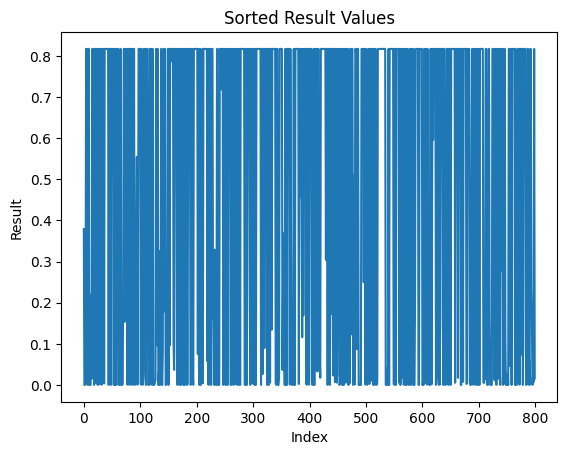

In [38]:
result = model.predict(train_dataset)


import matplotlib.pyplot as plt

plt.plot(range(len(result)), result)
plt.xlabel('Index')
plt.ylabel('Result')
plt.title('Sorted Result Values')
plt.show()

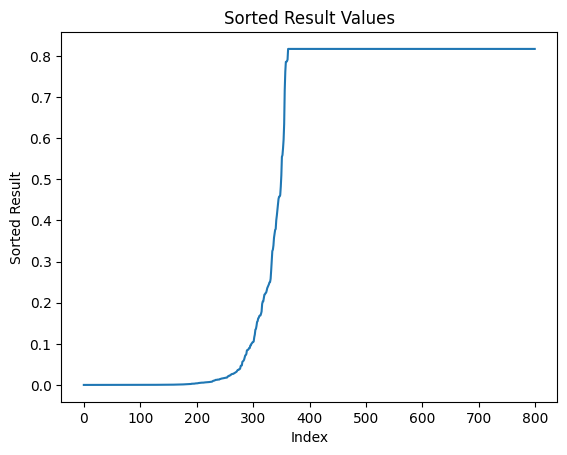

In [40]:
import numpy as np
result_sorted = np.sort(result, axis=0)

# Flatten the sorted result to get a 1D array
result_sorted = result_sorted.flatten()

# Plot the sorted result
plt.plot(range(len(result_sorted)), result_sorted)
plt.xlabel('Index')
plt.ylabel('Sorted Result')
plt.title('Sorted Result Values')
plt.show()

In [41]:
sum(test_df['Intersection'] == 1),sum(result<= 0.5)

(88, array([350]))

In [42]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
sc = 0.6

a = accuracy_score(y_true=train_df['Intersection'],y_pred=result> sc)
b = precision_score(y_true=train_df['Intersection'],y_pred=result> sc)
c = recall_score(y_true=train_df['Intersection'],y_pred=result> sc)
d = confusion_matrix(y_true=train_df['Intersection'],y_pred=result> sc)
a,b,c,d

(0.51625,
 0.5460674157303371,
 0.5677570093457944,
 array([[170, 202],
        [185, 243]], dtype=int64))

In [47]:
model.save('res50Final')

INFO:tensorflow:Assets written to: res50Final\assets


INFO:tensorflow:Assets written to: res50Final\assets


In [46]:
sc

0.5

In [48]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
import numpy as np 
import matplotlib.pyplot as plt

In [49]:
img_path = '../Test_Data/_panoid_--2PQ1U5-r20HZJQySYogw_heading_324_pitch_2.png'
img = image.load_img(img_path, target_size=(640, 640))  # Adjust target size based on your model input shape
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)
img_array.shape
import cv2

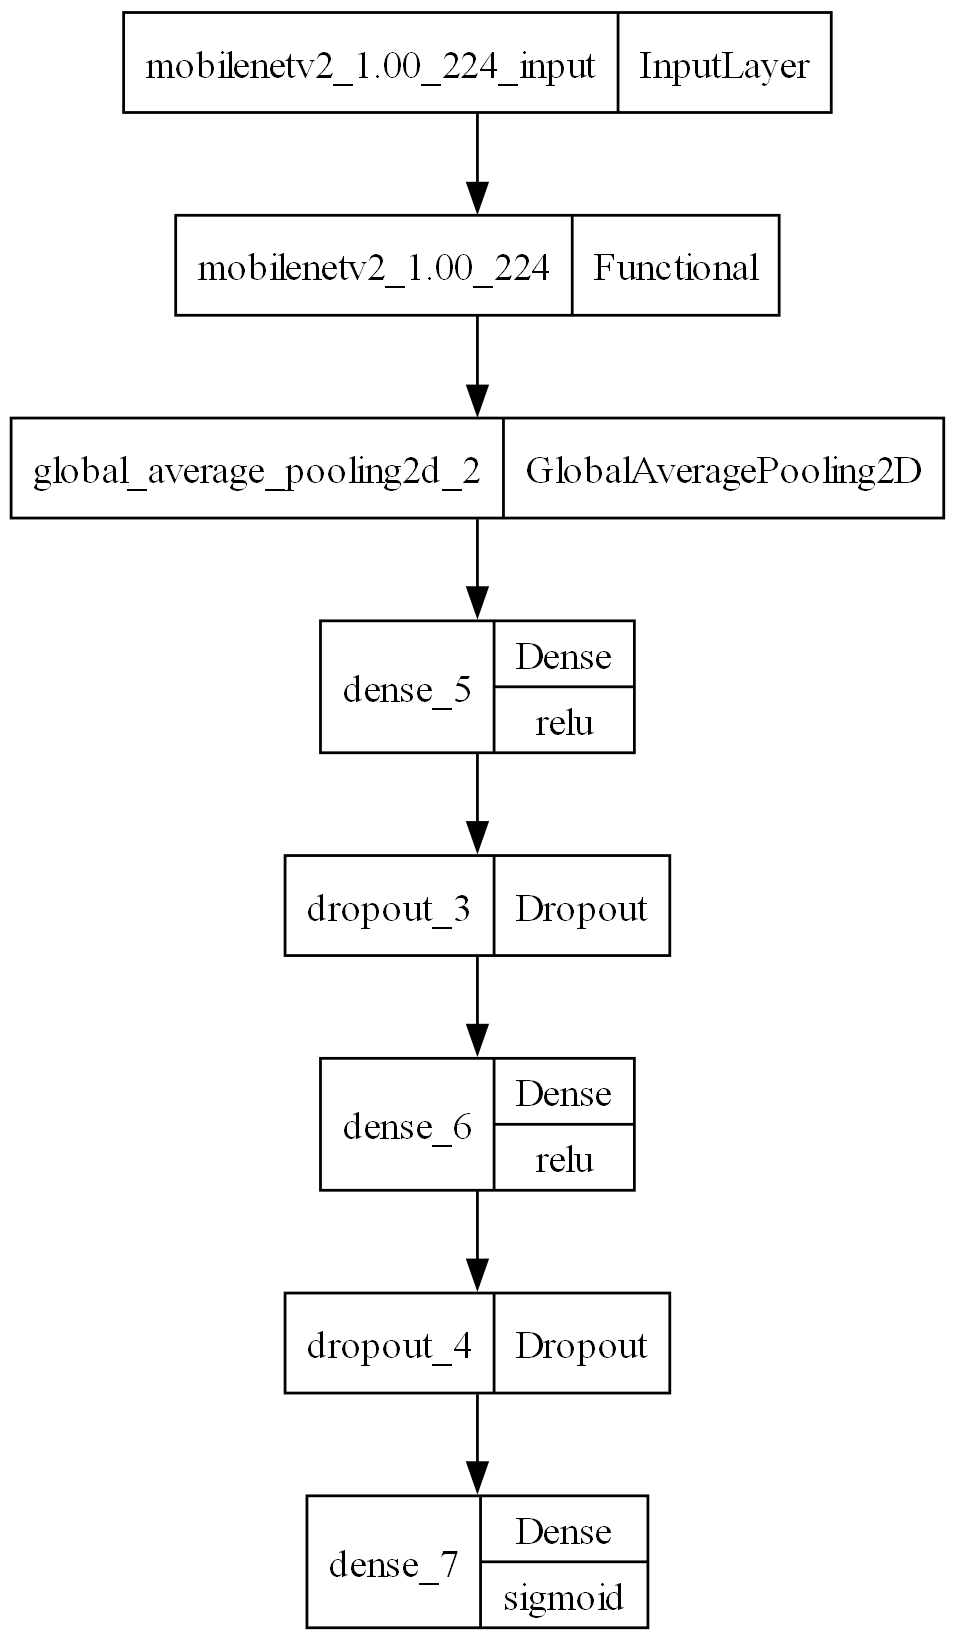

In [50]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=200,
    show_layer_activations=True)

In [51]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 20, 20, 1280)     2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_2   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_5 (Dense)             (None, 1000)              1281000   
                                                                 
 dropout_3 (Dropout)         (None, 1000)              0         
                                                                 
 dense_6 (Dense)             (None, 500)               500500    
                                                                 
 dropout_4 (Dropout)         (None, 500)              

In [52]:
from tensorflow.keras.preprocessing import image
# Assumes the image is saved as "test_image.jpg"
img = image.load_img("../Test_Data/_panoid_0aOhSv0EjLoEZl39Ogih2Q_heading_251_pitch_7.png", target_size=(640, 640))
img_array = image.img_to_array(img)
# Expand dimensions to match the model's input
img_array = np.expand_dims(img_array, axis=0)

In [55]:
from tensorflow.keras.applications import MobileNetV2
model = MobileNetV2(weights="imagenet", include_top=False,input_shape=(640,640,3))

In [59]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Replace "mobilenetv2_1.00_224" with the actual layer name in your model architecture
target_layer = model.get_layer("mobilenetv2_1.00_224")
# Replace 1000 with the output dimension of your last dense layer before the final classification layer
classifier_layer = Dense(1000)

gradcam_fn = build_and_apply_gradcam(model, target_layer, classifier_layer)


ModuleNotFoundError: No module named 'gradcam'